# **Setup**

In [ ]:
#Liberias generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Liberias preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#Librerias modelos
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rwyld/Data-Science-Models/main/Modelos/KMeans/MktCampaignCSV%20-%20KMeans-PCA.csv')
data.head()

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
1,2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
2,4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0
3,6182,26646.0,26,11,20,10,3,5,2,2,0,4,6,31,91,1
4,5324,58293.0,94,173,118,46,27,15,5,5,3,6,5,34,347,1


# **Analisis Exploratorio**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Income               2216 non-null   float64
 2   Recency              2216 non-null   int64  
 3   MntWines             2216 non-null   int64  
 4   MntMeatProducts      2216 non-null   int64  
 5   MntFishProducts      2216 non-null   int64  
 6   MntSweetProducts     2216 non-null   int64  
 7   MntGoldProds         2216 non-null   int64  
 8   NumDealsPurchases    2216 non-null   int64  
 9   NumWebPurchases      2216 non-null   int64  
 10  NumCatalogPurchases  2216 non-null   int64  
 11  NumStorePurchases    2216 non-null   int64  
 12  NumWebVisitsMonth    2216 non-null   int64  
 13  Age                  2216 non-null   int64  
 14  Seniority            2216 non-null   int64  
 15  Children             2216 non-null   i

In [ ]:
data.describe()

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,49.012635,305.091606,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,46.179603,538.006318,0.947202
std,3249.376275,25173.076661,28.948352,337.327920,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,11.985554,232.469034,0.749062
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,26.000000,0.000000
25%,2814.750000,35303.000000,24.000000,24.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,38.000000,366.000000,0.000000
50%,5458.500000,51381.500000,49.000000,174.500000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,45.000000,539.000000,1.000000
75%,8421.750000,68522.000000,74.000000,505.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,56.000000,712.000000,1.000000
max,11191.000000,666666.000000,99.000000,1493.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,122.000000,1089.000000,3.000000


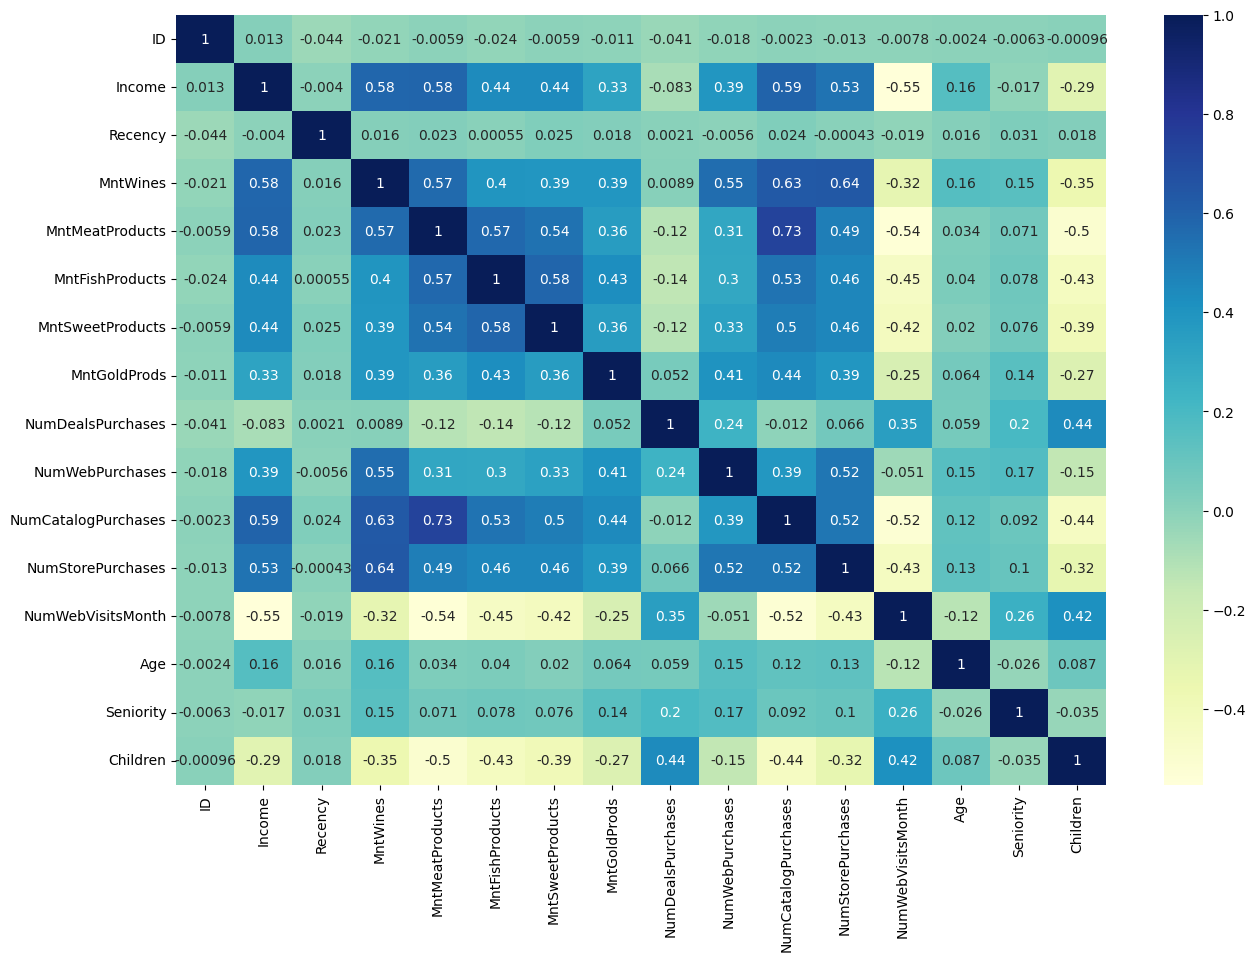

In [ ]:
corr = data.corr()

fig, ax = plt.subplots(1,1, figsize = (15,10))

ax = sns.heatmap(corr, annot=True, cmap="YlGnBu")

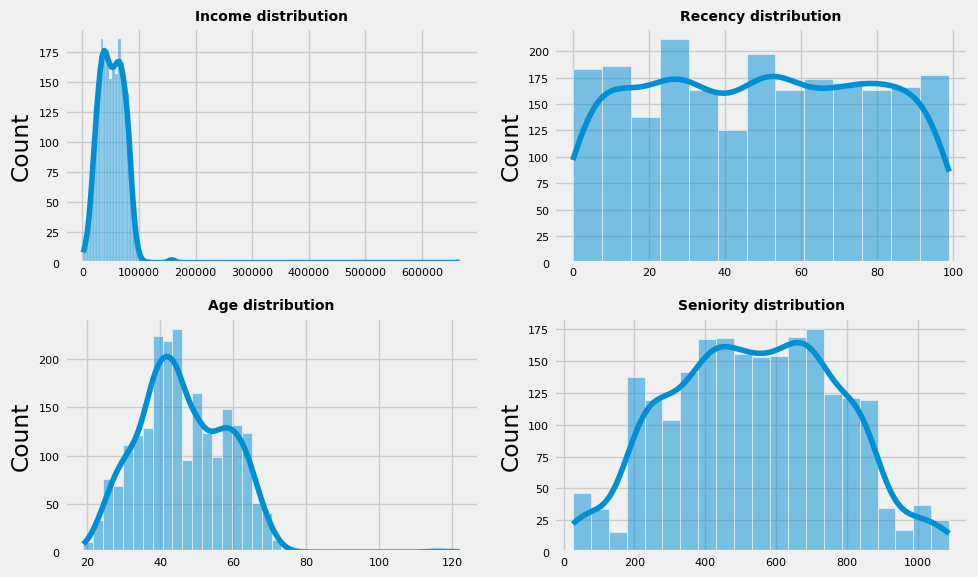

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10,6))

sns.histplot(data = data, x = data.Income, stat = 'count', kde = True, alpha = 0.5, ax = ax[0][0])
ax[0][0].set_title('Income distribution', fontsize = 10, fontweight = "bold")
ax[0][0].tick_params(labelsize = 8)
ax[0][0].set_xlabel("")

sns.histplot(data = data, x = data.Recency, stat = 'count', kde = True, alpha = 0.5, ax = ax[0][1])
ax[0][1].set_title('Recency distribution', fontsize = 10, fontweight = "bold")
ax[0][1].tick_params(labelsize = 8)
ax[0][1].set_xlabel("")

sns.histplot(data = data, x = data.Age, stat = 'count', kde = True, alpha = 0.5, ax = ax[1][0])
ax[1][0].set_title('Age distribution', fontsize = 10, fontweight = "bold")
ax[1][0].tick_params(labelsize = 8)
ax[1][0].set_xlabel("")

sns.histplot(data = data, x = data.Seniority, stat = 'count', kde = True, alpha = 0.5, ax = ax[1][1])
ax[1][1].set_title('Seniority distribution', fontsize = 10, fontweight = "bold")
ax[1][1].tick_params(labelsize = 8)
ax[1][1].set_xlabel("")

plt.tight_layout()
plt.show()

# **Detectando Anomalias**

In [ ]:
dataPurchase = data[['NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases', 'Age', 'Income']]

pca = PCA(n_components=2)
checkData = pca.fit_transform(dataPurchase)

isofor = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.05, random_state=42)
isofor.fit(checkData)

y_pred = isofor.predict(checkData)
anomalies = dataPurchase[y_pred == -1] 

print("Anomalías detectadas")
display(anomalies.head(3))


Anomalías detectadas


,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Age,Income
9,1,1,0,0,65,5648.0
16,2,4,1,6,69,37760.0
20,15,0,28,0,36,2447.0


In [ ]:
print("\nNueva base de datos sin anomalias")
newData = data[y_pred == 1]
newData.head(3)


Nueva base de datos sin anomalias


,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,5524,58138.0,58,635,546,172,88,88,3,8,10,4,7,58,997,0
1,2174,46344.0,38,11,6,2,1,6,2,1,1,2,5,61,151,2
2,4141,71613.0,26,426,127,111,21,42,1,8,2,10,4,50,498,0


In [ ]:
newData.describe()

,ID,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
count,2106.000000,2106.000000,2106.00000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,5583.579772,51468.495252,49.15812,300.892213,158.948718,36.740266,26.526116,43.587369,2.349003,4.089269,2.572650,5.818139,5.353751,46.243590,538.783951,0.981481
std,3257.540072,19814.442832,29.01868,332.459088,208.359465,54.088873,40.412064,50.780757,1.820767,2.632450,2.685528,3.201495,2.251572,11.077615,232.968509,0.741148
min,0.000000,7500.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,23.000000,26.000000,0.000000
25%,2793.500000,35651.250000,24.00000,24.250000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,4.000000,38.000000,368.000000,0.000000
50%,5501.500000,51075.000000,49.00000,173.500000,66.500000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,45.000000,539.000000,1.000000
75%,8431.500000,67442.000000,74.00000,494.750000,220.500000,46.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,55.000000,714.000000,1.000000
max,11191.000000,102692.000000,99.00000,1493.000000,984.000000,259.000000,198.000000,249.000000,15.000000,11.000000,11.000000,13.000000,10.000000,70.000000,1089.000000,3.000000


# **Reduciendo data significativa**

In [ ]:
newData = newData.drop('ID', axis=1)

In [ ]:
modelData = StandardScaler().fit_transform(newData)
pcaModel = PCA().fit(modelData)

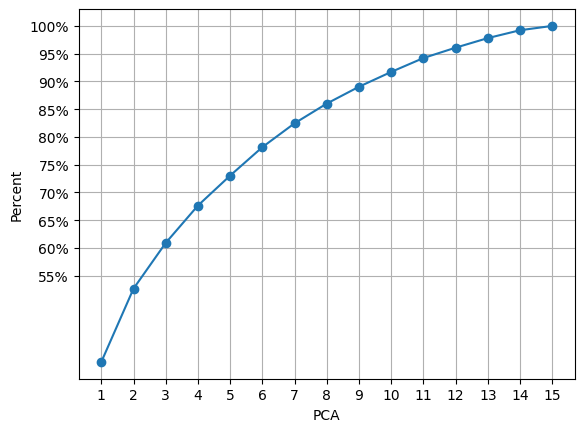

In [ ]:
plt.plot(
    range(1, len(pcaModel.components_) + 1),
    np.cumsum(pcaModel.explained_variance_ratio_),
    marker = "o"
)
plt.xticks(
    ticks = np.arange(newData.shape[1]) + 1,
)
plt.yticks(
    ticks  = np.linspace(0.55, 1, 10),
    labels = [f"{val:0.0%}" for val in np.linspace(0.55, 1, 10)]
);

plt.ylabel('Percent')
plt.xlabel('PCA')
plt.grid()

In [ ]:
pca = PCA(n_components=10)
pcaData = pca.fit_transform(newData)

scaler = StandardScaler()
scalerData = scaler.fit_transform(pcaData)

unscalerData = scaler.inverse_transform(scalerData)
originalData = pca.inverse_transform(unscalerData)

newModelData = pd.DataFrame(originalData, columns = newData.columns)
newModelData.head(3)

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,58137.999760,58.003654,635.009772,546.003264,171.991888,87.998768,88.031796,2.200633,5.581251,6.196636,8.045333,4.774024,58.063415,997.006733,0.066969
1,46343.999886,38.000726,10.999054,5.996289,1.989249,0.988710,6.000042,1.097712,1.184169,0.986014,2.875613,4.223736,61.014259,151.002482,1.358496
2,71613.000092,25.996878,425.999282,127.000776,111.007611,21.008101,41.989594,3.322357,6.871437,3.505213,9.257825,4.627088,49.950795,497.996745,1.145663


# **Modelando Clusters**

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 1234,
}

# Una lista contiene los valores de SSE para cada k
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs) # el operador (**) es de desempaquetado del diccionario de Python 
    kmeans.fit(newModelData)
    sse.append(kmeans.inertia_)

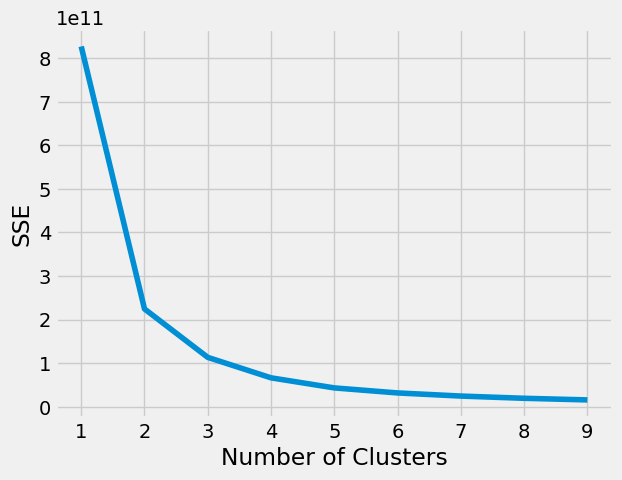

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 10), sse)
 plt.xticks(range(1, 10))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=1234
)
kmeans.fit(newModelData)

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=newModelData.columns).sort_values(by = ['Income'], ascending = True).reset_index().drop(['index'], axis=1)

In [ ]:
clusterData = pd.DataFrame(newModelData)
clusterData['cluster'] = kmeans.labels_
clusterData[clusterData['cluster'] == 1].head(3)

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children,cluster
3,26646.000039,25.999822,10.999678,20.000800,10.002961,3.002401,4.998768,2.022852,2.342843,0.090874,3.470535,6.278420,30.996512,90.999230,1.062659,1
7,33453.999906,31.998313,76.000075,55.996994,2.993640,0.993314,22.994619,2.783624,3.460360,0.583096,4.505300,6.980369,29.980421,514.001593,1.129710,1
8,30350.999808,18.997455,14.001814,23.995691,2.989012,2.988796,1.995018,2.179210,2.096232,0.328634,3.122362,6.790842,40.974259,574.003897,1.187392,1


# **Visualizacion Clusters**

<Axes: xlabel='Income', ylabel='Recency'>

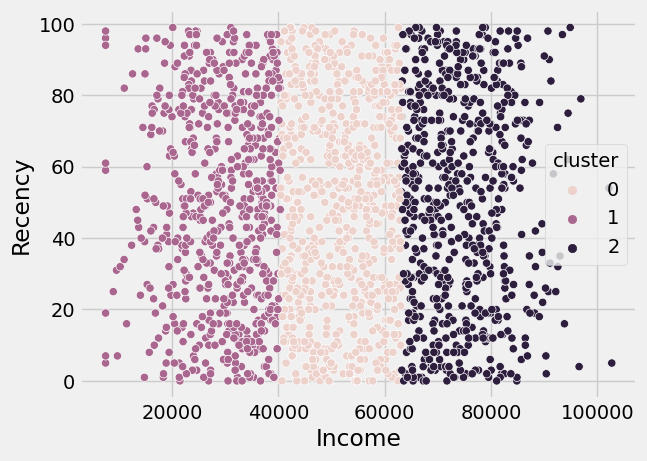

In [ ]:
sns.scatterplot(x=clusterData.Income, y=clusterData.Recency, data=clusterData, hue = clusterData.cluster)

In [ ]:
display(centroids)

,Income,Recency,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Seniority,Children
0,29112.412763,48.693443,31.273878,23.865221,8.855411,6.126242,16.870502,2.198025,2.140387,0.513195,3.097245,6.738484,41.582260,540.790143,1.159534
1,51642.767940,49.185319,268.328349,89.583649,23.674924,16.663919,43.695014,2.916185,4.635857,2.155341,6.142061,5.742165,48.752324,543.693622,1.207589
2,74562.830152,49.612926,616.486250,373.799789,79.750798,58.316576,71.294100,1.899667,5.534220,5.163561,8.305156,3.496368,48.414807,531.444264,0.554260


# **Interpretando**

Los centroides nos indican el punto medio o el centro de cada cluster.

Por ejemplo, tomando en cuenta la variable Income:

- En el cluster 0 su centroide es de 29112
- En el cluster 1 su centroide es de 51642
- En el cluster 2 su centroide es de 74562

Y asi se observa para cada variable su respectivo centroide en su correspondiente Cluster. 
Por lo tanto, los centroides nos ayudan a predecir nuevos datos cercanos a los cluster mediante el calculo de la distancia euclidiana entre ellos.